## Email or SMS Spam Classifier 

In [285]:
import numpy as np 
import pandas as pd 

In [286]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [287]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1429,spam,For sale - arsenal dartboard. Good condition b...,NaN,NaN,NaN
2086,ham,Dude how do you like the buff wind.,NaN,NaN,NaN
3677,spam,Promotion Number: 8714714 - UR awarded a City ...,NaN,NaN,NaN
4411,ham,If i said anything wrong sorry de:-),NaN,NaN,NaN
4830,ham,Po de :-):):-):-):-). No need job aha.,NaN,NaN,NaN


In [288]:
df.shape

(5572, 5)

## Stages of Project

### 1. Data Cleaning 
### 2. EDA 
### 3. Text Preprocessing 
### 4. Model Building 
### 5. Evaluation 
### 6. Improvements 
### 7. Embeding Model in to Web App
### 7. Deployment

# 1. Data Cleaning

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [290]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [291]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [292]:
# Renaming the Columns 

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [293]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [294]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [295]:
df['target']=encoder.fit_transform(df['target'])

In [296]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [297]:
# Missing Values 

df.isnull().sum() 

target    0
text      0
dtype: int64

In [298]:
# check for duplicate values 

df.duplicated().sum() 


403

In [299]:
df=df.drop_duplicates(keep='first')

In [300]:
df.duplicated().sum() 

0

In [301]:
df.shape

(5169, 2)

## EDA 

In [302]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [303]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

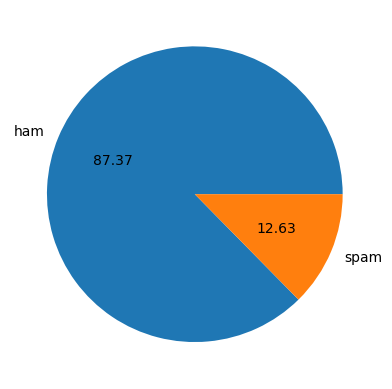

In [304]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [305]:
import nltk 

In [306]:
# 3 new columns -> ,  number of characters in sms , number of words in sms, number of sentences in sms 

In [307]:
df['num_characters']=df['text'].apply(len)

In [308]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [309]:
# num of words 

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [310]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [311]:
# number of sentences  
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [312]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


### Describe for Ham Messages 

In [313]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### Describe for Spam Messages 

In [314]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Conclusion: we can see that spam messages bade hote hai generally 

In [315]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

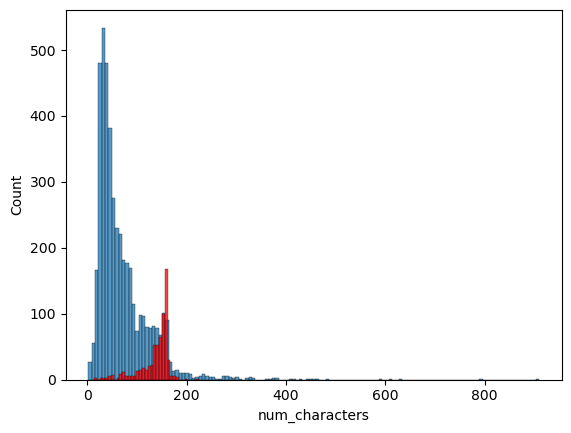

In [316]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

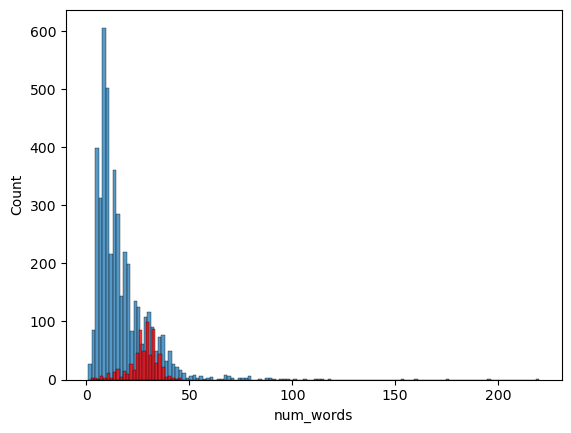

In [317]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

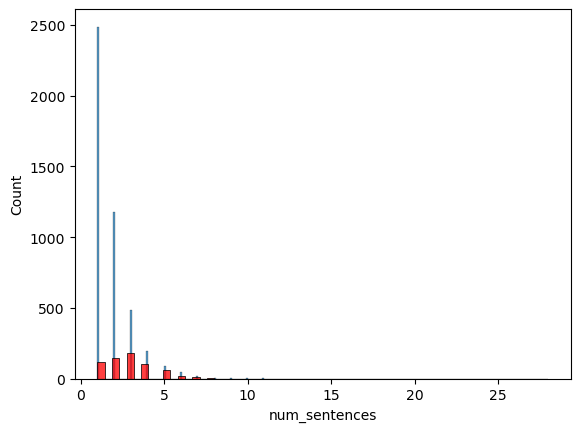

In [318]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

<AxesSubplot:>

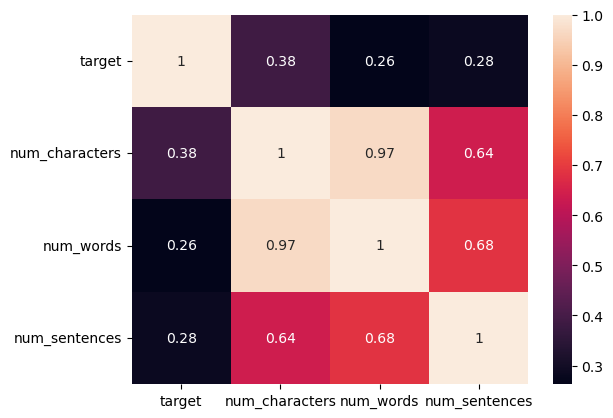

In [319]:
# sns.heatmap(df.corr())
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing or Text Preprocessing

1. lower case 
2. Tokenization 
3. Removing Special Characters 
4. Stemming

In [320]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer() 



def transform_text(text):
    text = text.lower() # lowercase
    text = nltk.word_tokenize(text)  #Tokenization 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) 

    text = y[:] 
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:

            y.append(i)
    text = y[:] 
    y.clear()
    
    for i in text: 
        y.append(ps.stem(i))

    return " ".join(y)

In [321]:
transform_text("did you like my presentation ?")

'like present'

In [322]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [323]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [324]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer() 
ps.stem('dancing')

'danc'

In [325]:
df['transform_text'] = df['text'].apply(transform_text)

In [326]:
df

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Word Cloud 

In [327]:
from wordcloud import WordCloud

In [328]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [329]:
spam_cloud=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

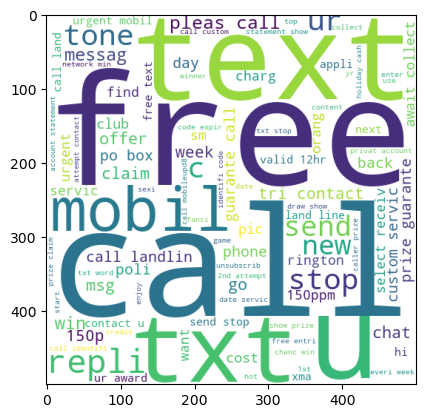

In [330]:
plt.imshow(spam_cloud)

In [331]:
ham_cloud=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

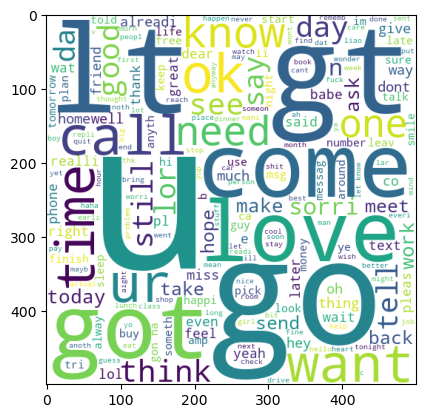

In [332]:
plt.imshow(ham_cloud)

In [333]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Spam Corpus

Jo Spam words hai usme top 50 words kaunse hai vo pata krna hai so abh hum yeah krenge


In [334]:
spam_corpus = []
for msg in df[df['target']== 1]['transform_text'].tolist():
    # print(msg)
    for word in msg.split():
        spam_corpus.append(word)


In [335]:
len(spam_corpus)

9939

In [336]:
# spam_corpus

In [337]:
from collections import Counter

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


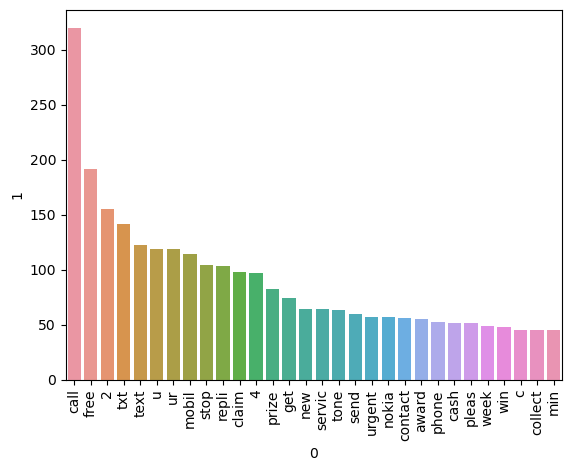

In [338]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### *Precision* 
Precision measures the percentage of emails flagged as spam that were correctly classified—that is,   
 the percentage of dots to the right of the threshold line

### *Recall*

Recall measures the percentage of actual spam emails that were correctly classified—that is,    
the percentage of green dots that are to the right of the threshold line

# Model Building 

In [347]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [360]:
cv = CountVectorizer() 
tfidf=TfidfVectorizer(max_features=3000)

In [361]:
# x = cv.fit_transform(df['transform_text']).toarray() 
x = tfidf.fit_transform(df['transform_text']).toarray() 

In [362]:
x.shape

(5169, 3000)

In [363]:
y = df['target'].values

In [364]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [367]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [368]:
gnb = GaussianNB()
mnb = MultinomialNB() 
bnb = BernoulliNB()

In [369]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [370]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [371]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Conclusion : Bernoulli & Multinomial dono ka accuracy score are good! but  We will go with Multinomial as uska Precision is great   
Precision means : jo classify kiya spam ko vo spam hie hai 

# Pipeline

1.transform 
2.vectorized
3.applying model

In [372]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))